In this assignemnt, you will use tensorflow to build and train a multilayer feedforward neural network. The dataset you will be working with is the famous fMNIST dataset. Your main goal is to purposefully introduce bias in the training dataset and see how it performs during the testing session.

Thus, let's start your journey in the world of Neural Nets.

This assignemnt will be structured such that you will have to complete the code.
There will be sections of code (+commentary) that will guide you through the process, and create the logic of the script.

For start we will import the necessary packages that will make this code work. You will extensively use the keras module from the tensorflow package. You don't need to be familiar with it, however if here's the link to the documentation https://www.tensorflow.org/api_docs/python/tf/keras.

Besides the tensorflow package, you have included a couple more package that you might find useful. Feel free to import other packages and modules.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# importing tensorflow
import tensorflow as tf

#other helpful libraries
import random
import numpy as np
import matplotlib.pyplot as plt

This code is going to work with the MNIST Fashion dataset. This dataset is a collection of $70000$ grayscale images from $10$ different categories. The images show individual articles of clothing. 

The MNIST Fashion dataset is a the next logical step in complexity after the MNIST dataset. Both datasets are relatively small and are used to verfiy that an algorithm works as expected. They are good starting points to test and debug code.

In this code we will be importing $60000$ of the images as our training dataset and the remaining $10000$ will be used to test our network learning. 

Let's start by importing the data and defining the fashion categories as a list of strings. You don't have to change/add anything else.

In [ ]:
fashion_minst = tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_minst.load_data()

# since the category name is not stored in the dataset, we will make it exlpicit here
# notice that the training and testing labels are actually represented.
#     hint: check the elements stored in train_labels_full and test_labels

class_name = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# We desire each pixel in the image to be associated with a number from 0 to 1, 
# thus we divide by 255

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# You can use functions/operations like len() and shape to better understand teh structure of your dataset

# ex: 
# len(train_images)      - gives you the number of images in the trainig dataset
# train_images[0].shape  - gives you the shape of the 0th image (notice that each image is a 28x28 pixels object that is being stored as an array) 

This is a dress


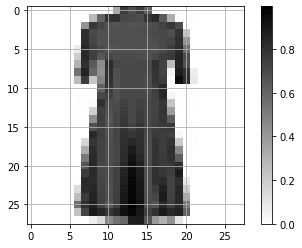

In [ ]:
# Run this cell o plot one of the training images to see what you're working with
plt.figure()

idx = np.random.randint(0,len(train_images))
print(f'This is a {class_name[train_labels[idx]]}')
plt.imshow(train_images[idx], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.show()



Before building our feed forward neural network, we will introduce some bias in our trainig dataset. For that you will chose a category of your choice  and select only $1, 5, 10, 100~\%$ of the training data of that category (ex: select only $1~\%$ of the training data labeled coat).

Notice that the `train_images` and `train_labels` are matched and shuffled datasets (i.e. each image corresponds to its label).

From the original training datasets you will have to remove / or select only a small amount the data from a particular category.

In [ ]:
selectedNum = 2 # select the number you want to bias 0 ... 9
percentOfData = [0.01, 0.05, 0.1, 1.0]  # how much do you want to bias

We decided to bias the set of pullovers


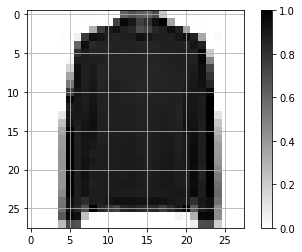

In [ ]:
bias_list = []

x_train_full = train_images.copy()
y_train_full = train_labels.copy()

# sorting and selecting the idex of elements that we want to bias

for i in range( len(x_train_full)):
    if y_train_full[i] == selectedNum:
        bias_list.append(i)


numElement = [int( len(bias_list)*percentOfData[i] ) for i in range(len(percentOfData))] # numbers of elements in each biased list
biasIdx = [random.sample(bias_list, numElement[i]) for i in range(len(percentOfData))] # select biased elements only

x_train = []
y_train = []


for bias_case in range(len(percentOfData)):
    data_train = []
    label_train = [] 
    for i in range(len(x_train_full)):

        if y_train_full[i] != selectedNum: # append all unbiased elements
            data_train.append(x_train_full[i])
            label_train.append(y_train_full[i])

        elif y_train_full[i] == selectedNum and i in biasIdx[bias_case]: # append only biased elements

            data_train.append(x_train_full[i])
            label_train.append(y_train_full[i])

    # make the lists into numpy arrays for compatability with tensormflow

    data_train = np.array(data_train)
    label_train = np.array(label_train)

    x_train.append(data_train)
    y_train.append(label_train)    



# Run this cell o plot one of the training images to see what you're working with
plt.figure()
print(f'We decided to bias the set of {class_name[selectedNum]}s')
plt.imshow(train_images[biasIdx[0][0]], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.show()

In what follows let's build our feed forward neural network.
Our network will have an input layer, 2 hidden layers, and an output layer.

For the input layer, use the following code:

`tf.keras.layers.Flatten(input_shape = (28, 28))`

Notice that we are flattening a $28\times28$ array into a $1D$ array of size $784.$.

For the output layer use:

`tf.keras.layers.Dense(10, activation = 'softmax')`

Notice that the size of the layer is $10$, corresponding to the total number of categories.

For the hidden (inbetween) layers, use the follwoing syntax:

`tf.keras.layers.Dense(`$size$, activation = 'relu')`

*You could use a size of 128 for fast results, however **we strongly encourage** you to play around with **different sizes** along with **multiple layers**. This will allow you to get a better understanding on how the arhitecture of your neural network affects the results.*


In [ ]:
# Let's proceed with building the model

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense( 128 , activation = 'relu'),
                             tf.keras.layers.Dense( 128 , activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])

# Now we initialize the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


Now that our model is trained, you will have to use it to predict labels based on your testing data set. To do this you can use the following method:

`model.predict( your_input )`.

However, first you will determine the accuracy of the model (number of correct predctions / total predictions) of the entire dataset, and afterwards you will have to sort the testing data into individual sets based on the category, and then deterime the prediction accuracy of the model for each category.

What can you say about the relation between the bias you introduced and the accuracy of the trained model?



In [ ]:
# sorting test images and labels by category

sorted_test_labels =[[] for i in range(len(class_name)) ]
sorted_test_images =[[] for i in range(len(class_name)) ]


for idx in range(len(test_labels)):
    class_idx = test_labels[idx]
    image_item = test_images[idx]

    sorted_test_labels[class_idx].append(class_idx)
    sorted_test_images[class_idx].append(image_item)

In [ ]:
# Now let's train and test the model

full_prediction_list = []
overall_model_accuracy = []

for bias_case in range(len(percentOfData)):

    bias_percent = percentOfData[bias_case]

    model.fit( x_train[bias_case] , y_train[bias_case], epochs = 20, verbose = 0); # verbose = 0 supresses output remove to see how loss & accurcay chage per epoch

    #print("___________________________________________\n___________________________________________")

    fullNetworkOutput = [[] for i in range(len(class_name))]
    predictList = [[] for i in range(len(class_name))]

    # appending the full results of the network prediction
    for idx in range(len(class_name)):
        fullNetworkOutput[idx].append(model.predict(np.array(sorted_test_images[idx]))) # full prediction of each case and category

    overall_model_accuracy.append(model.evaluate(test_images, test_labels, verbose=0)) # testing [loss, accuracy] for the unsorted train data

    # selecting the argmax of each prediction per category - the 0 in [i][0][j] is due to output from model.predict
    for i in range(len(class_name)):
        for j in range(len(fullNetworkOutput[0][0])):
            predictList[i].append(np.argmax(fullNetworkOutput[i][0][j])) # select the most probable prediction

    full_prediction_list.append(predictList)

    # printing & comparing model prediction labels vs actual labels as correct/total * 100% 

    print(f'\nBiased Set: {class_name[selectedNum]} ({bias_percent*100}% of data) \n')
    print(f'\nOverall Accuracy: {np.round(overall_model_accuracy[bias_case][1]*100 , 1)}%\n\nAccuracy Value per category:\n')
    for i in range(len(class_name)):
        print( f'{class_name[i]}: {100*np.sum([full_prediction_list[bias_case][i][j] == sorted_test_labels[i][j] for j in range(len(full_prediction_list[bias_case][i]))]) / len(sorted_test_labels[i])}%')

    print("___________________________________________\n___________________________________________")



Biased Set: pullover (1.0% of data) 


Overall Accuracy: 83.6%

Accuracy Value per category:

t-shirt/top: 84.9%
trouser: 97.8%
pullover: 11.1%
dress: 89.4%
coat: 87.1%
sandal: 96.3%
shirt: 78.3%
sneaker: 96.7%
bag: 97.7%
ankle boot: 96.7%
___________________________________________
___________________________________________

Biased Set: pullover (5.0% of data) 


Overall Accuracy: 85.9%

Accuracy Value per category:

t-shirt/top: 85.8%
trouser: 97.3%
pullover: 36.4%
dress: 91.4%
coat: 86.3%
sandal: 97.0%
shirt: 77.8%
sneaker: 95.7%
bag: 94.7%
ankle boot: 96.3%
___________________________________________
___________________________________________

Biased Set: pullover (10.0% of data) 


Overall Accuracy: 86.0%

Accuracy Value per category:

t-shirt/top: 81.0%
trouser: 97.9%
pullover: 41.5%
dress: 90.7%
coat: 84.0%
sandal: 97.4%
shirt: 77.7%
sneaker: 95.7%
bag: 97.8%
ankle boot: 96.3%
___________________________________________
___________________________________________

Biased Set: